# Solving least square problem


a)QR factorization with modified Gram Schmidt   b)QR factorization with Householder factorization
c)SVD
d)Normal euations


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#number of points
m=100

#polynomial degree
n=15 

In [3]:
t=np.zeros(m)
f=np.zeros(m)
A=np.zeros((m,n))

***Creating input data***

In [4]:
#input data
t=np.array([i/m for i in range(m)])

#output data
f=np.sin(10*t)

#making matrix A
for i in range(m):
  for j in range(1,n):
    A[i][j]=(t[i])**(j)
A[:,0]=1


b=f

In [5]:
print(A[1,:])

[1.e+00 1.e-02 1.e-04 1.e-06 1.e-08 1.e-10 1.e-12 1.e-14 1.e-16 1.e-18
 1.e-20 1.e-22 1.e-24 1.e-26 1.e-28]


In [6]:
def make_plot(t,f,estimated_f,algoritm_name):
  plt.figure(figsize=(20,10))
  plt.plot(t, f, color='blue',marker='o',linestyle='None', markerfacecolor='green', markersize=4) 
  plt.plot(t, estimated_f, color='red', linestyle='solid', linewidth = 2)
  plt.xlabel('t')
  plt.ylabel('f(t)')
  plt.title("f vs Estimated-f from "+algoritm_name)
  plt.legend(['actual-f','estimated-f']) 
  plt.show()

In [7]:
def back_subsitution(R,b):
  n=R.shape[0]
  x=np.zeros(n)
  k=n-1    
  x[k] = b[k]/R[k,k]
  while k >= 0:
    x[k] = (b[k] - np.dot(R[k,k+1:],x[k+1:]))/R[k,k]
    k = k-1
  print(x)
  return x

In [ ]:
"""
i=0;
Q=np.zeros((m,n))
R=np.zeros((n,n))


#j is the variable 
#we are making aj into Qj
for j in range(0,n):
  #print("For Q"+str(j)+"calculation")
  #print("---------------------------------")
  for i in range(j+1):

    #print("\n",i,j,"\n")
    if i!=j:
      #print("\tcalculate R[",i,j,"]")
      R[i,j]=np.dot(Q[:,i],A[:,j])
    elif i==j:
      #writing the projector expression here..........
      P=np.eye(100)
      #print("P=I-",end = '')
      for k in range(j):
        #print("-Q[:,"+str(k)+"]"+"Q[:,"+str(k)+"]T",end = '')
        P=P-np.outer(Q[:,k],Q[:,k])
      #print("\nP",P)
      #print("\n A[:,j]",A[:,j])
      Q[:,j]=P@A[:,j]
      #print("\nQ[:,"+str(j)+"]",Q[:,j])
      #print("\n\tQ[:,"+str(j)+"]=P@A[:,"+str(j)+"]")
      R[j,j]=np.linalg.norm(Q[:,j])
      #print("\tcalculate R[",i,j,"]",R[j,j])

      Q[:,j]=Q[:,j]/R[j,j]     
      #print("\nQ[:,"+str(j)+"]",Q[:,j])

      #print("\tlast step is here.........",(i,j))

  #print("-------------------------")
  """

***checking:***

In [ ]:
"""
print(np.eye(100))
print(np.outer(Q[:,0],Q[:,0]))
temp_P=np.eye(100)-np.outer(Q[:,0],Q[:,0])
temp_P=np.eye(100)-np.outer(Q[:,0],Q[:,0])
print("P",temp_P)
temp=temp_P@A[:,1]
temp_Q=temp/np.linalg.norm(temp)
print(temp_Q)
"""

***Modified Gram-schmidt Algorithm:***

In [8]:
def modified_gram_schmidt(A):
  m=A.shape[0]
  n=A.shape[1]
  i=0;
  Q=np.zeros((m,n))
  R=np.zeros((n,n))
 
 
  #j is the variable 
  #we are making aj into Qj
  for j in range(0,n):
    #print("For Q"+str(j)+"calculation")
    #print("---------------------------------")
    for i in range(j+1):
 
      #print("\n",i,j,"\n")
      if i!=j:
        #print("\tcalculate R[",i,j,"]")
        R[i,j]=np.dot(Q[:,i],A[:,j])
      elif i==j:
        #writing the projector expression here..........
        P=np.eye(100)
        #print("P=I-",end = '')
        for k in range(j):
          #print("-Q[:,"+str(k)+"]"+"Q[:,"+str(k)+"]T",end = '')
          P=P-np.outer(Q[:,k],Q[:,k])
        #print("\nP",P)
        #print("\n A[:,j]",A[:,j])
        Q[:,j]=P@A[:,j]
        #print("\nQ[:,"+str(j)+"]",Q[:,j])
        #print("\n\tQ[:,"+str(j)+"]=P@A[:,"+str(j)+"]")
        R[j,j]=np.linalg.norm(Q[:,j])
        #print("\tcalculate R[",i,j,"]",R[j,j])
 
        Q[:,j]=Q[:,j]/R[j,j]     
        #print("\nQ[:,"+str(j)+"]",Q[:,j])
 
        #print("\tlast step is here.........",(i,j))
 
    #print("-------------------------")
  return Q,R

In [9]:
#calling modified gram_schmidt for A

Q,R=modified_gram_schmidt(A)
caculated_b=Q.T@b


***back subsitution:***

In [ ]:
#back subsitution:
"""
x=np.zeros(n)
k=14    
x[k] = caculated_b[k]/R[k,k]
while k >= 0:
  x[k] = (caculated_b[k] - np.dot(R[k,k+1:],x[k+1:]))/R[k,k]
  k = k-1
print("x=",x)
"""

In [10]:
x=back_subsitution(R,caculated_b)

[-2.01521217e-02  1.24008748e+01 -5.83684478e+01  4.11123711e+02
 -2.91857215e+03  9.03734673e+03 -1.27241741e+04  6.78427935e+03
  2.15217691e+03 -4.02722196e+03  1.38723203e+03 -4.72227261e+01
 -6.91347307e+00 -1.87724856e+00 -6.91285657e-01]


***Accuracy:***
Error using frobenious norm is:

In [11]:
estimated_f=np.array([np.dot(A[i,:],x) for i in range(100)])
print(" Error using frobenious norm is:",np.linalg.norm(estimated_f-f))

 Error using frobenious norm is: 0.06750554663166686


In [12]:
print("MSE:",1/m*np.sum(np.square(estimated_f-f)))

MSE: 4.556998826040148e-05


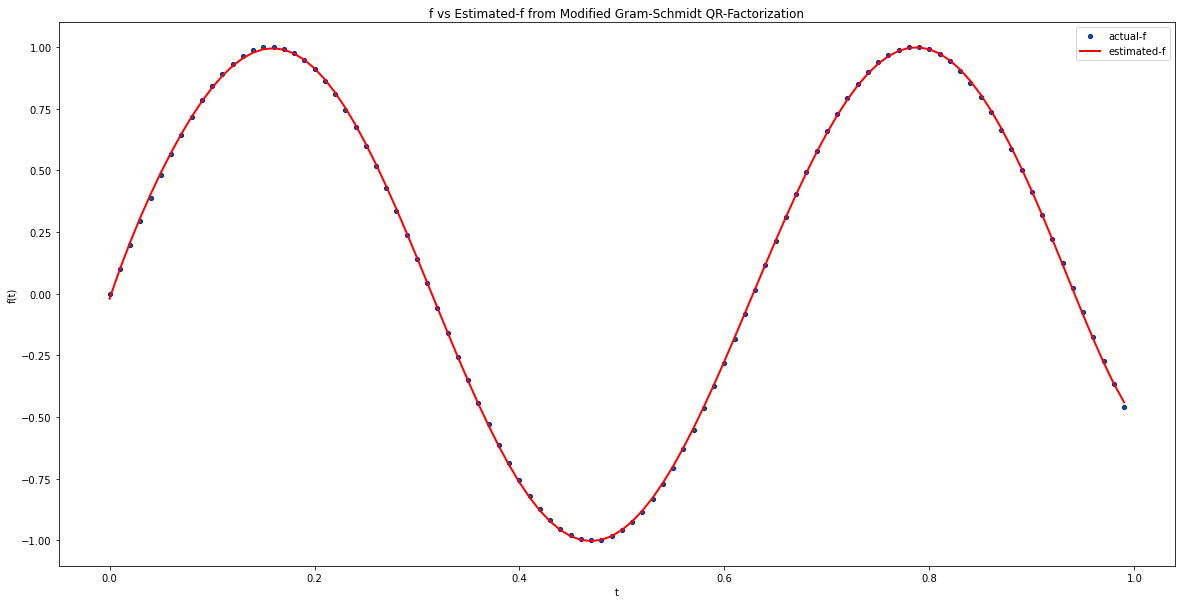

In [13]:
make_plot(t,f,estimated_f,algoritm_name='Modified Gram-Schmidt QR-Factorization')

***From Built in QR:***

In [14]:
Q_dash,R_dash=np.linalg.qr(A)
caculated_b=Q_dash.T@b


In [15]:
print(Q_dash.shape)
print(np.linalg.norm(np.eye(15)-Q_dash.T@Q_dash))

(100, 15)
1.7995902180112565e-15


In [51]:
"""
x=np.zeros(n)
k=14    
x[k] = caculated_b[k]/R_dash[k,k]
while k >= 0:
  x[k] = (caculated_b[k] - np.dot(R_dash[k,k+1:],x[k+1:]))/R_dash[k,k]
  k = k-1
print(x)
"""

'\nx=np.zeros(n)\nk=14    \nx[k] = caculated_b[k]/R_dash[k,k]\nwhile k >= 0:\n  x[k] = (caculated_b[k] - np.dot(R_dash[k,k+1:],x[k+1:]))/R_dash[k,k]\n  k = k-1\nprint(x)\n'

In [16]:
x=back_subsitution(R_dash,caculated_b)

[-9.36669978e-08  1.00000292e+01 -1.13823866e-03 -1.66662608e+02
  4.13124162e-01  8.24619343e+02  8.65067898e+01 -2.50618705e+03
  2.09187135e+03 -3.03110544e+03  1.11886863e+04 -1.74444083e+04
  1.31102575e+04 -4.90811092e+03  7.43576915e+02]


In [17]:
estimated_f=np.array([np.dot(A[i,:],x) for i in range(100)])
print(" Error using frobenious norm for built in QR is:",np.linalg.norm(estimated_f-f))

 Error using frobenious norm for built in QR is: 1.5994484300214638e-06


In [18]:
print("MSE:",1/m*np.sum(np.square(estimated_f-f)))

MSE: 2.5582352802981256e-14


***Using SVD:***

In [19]:
U,D,VT = np.linalg.svd(A)

In [20]:
D_inv=np.diag(1/D)
D_inv.shape
D_dash=np.zeros((15,100))
D_dash[0:15,0:15]=D_inv
print(D_dash.shape)

(15, 100)


In [21]:
x=VT.T@D_dash@U.T@b
print(x)

[-9.36661523e-08  1.00000292e+01 -1.13823871e-03 -1.66662608e+02
  4.13124162e-01  8.24619343e+02  8.65067898e+01 -2.50618705e+03
  2.09187135e+03 -3.03110544e+03  1.11886863e+04 -1.74444083e+04
  1.31102575e+04 -4.90811092e+03  7.43576915e+02]


In [22]:
estimated_f=np.array([np.dot(A[i,:],x) for i in range(100)])
print(" Error using frobenious norm is:",np.linalg.norm(estimated_f-f))

 Error using frobenious norm is: 1.6052212969326418e-06


In [23]:
print("MSE:",1/m*np.sum(np.square(estimated_f-f)))

MSE: 2.5767354121261124e-14


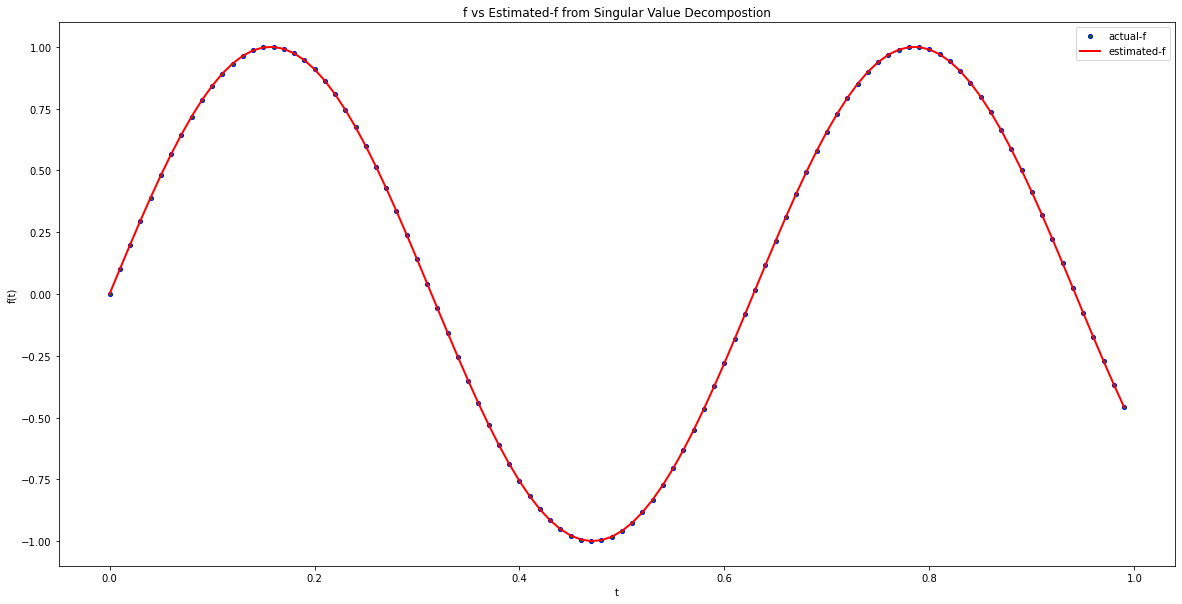

In [24]:
make_plot(t,f,estimated_f,algoritm_name='Singular Value Decompostion')

***Using normal Equations:***

In [25]:
x=np.linalg.inv(A.T@A)@A.T@b

In [26]:
estimated_f=np.array([np.dot(A[i,:],x) for i in range(100)])
print(" Error using frobenious norm for built in QR is:",np.linalg.norm(estimated_f-f))

 Error using frobenious norm for built in QR is: 4.987729315243017


In [27]:
print("MSE:",1/m*np.sum(np.square(estimated_f-f)))

MSE: 0.24877443722134576


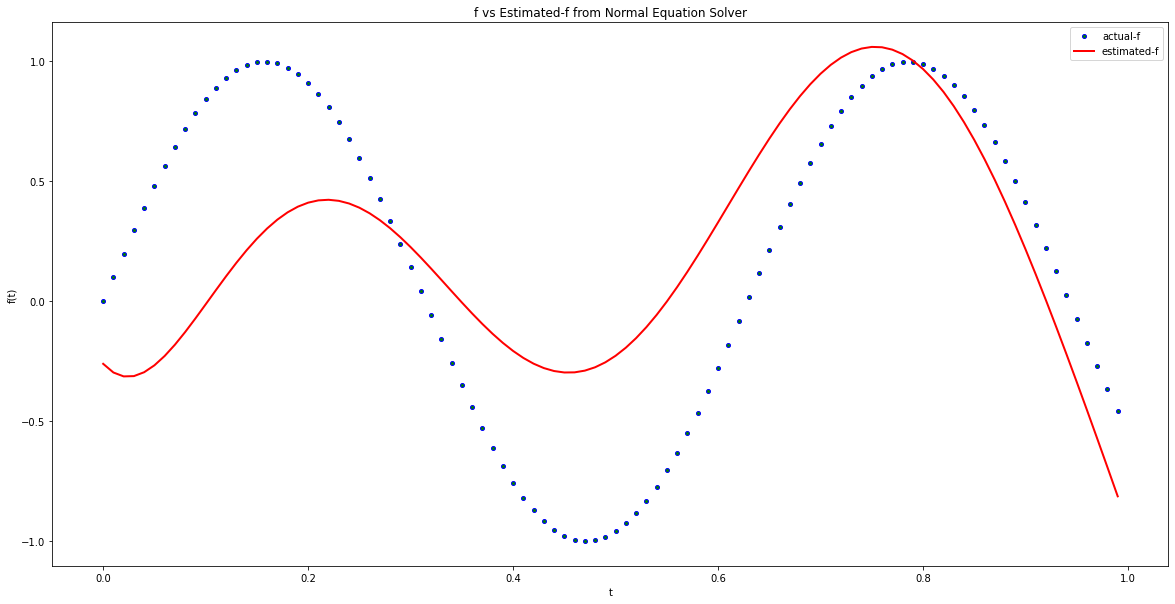

In [28]:
make_plot(t,f,estimated_f,algoritm_name='Normal Equation Solver')

***House-Holder-Traingularization:***

***Implemenation:***
The following is the function for House Holder Tringularization for solving Ax=b

In [29]:
def House_Holder_Triangularization(A,b):
  input_A=A.copy()
  input_b=b.copy()
  for k in range(15):
    #taking the A[k:m,k:n] as input for this iteration.
    input=input_A[k:m,k:n]

    #making the house holder reflector
    #---------------------------------------------------------
    x=input[:,0]
    norm_x=np.linalg.norm(x)
    size=x.shape[0]
    e1=np.zeros(size)
    e1[0]=1
    v=x+np.sign(x[0])*(norm_x)*e1
    v_k=v/np.linalg.norm(v)
    H=np.eye(size)-2*np.outer(v_k,v_k)
    #-------------------------------------------------------

    #print("input:",input.shape)
    #print("H dimenstion:",H.shape)
    input_A[k:m,k:n]=H@input_A[k:m,k:n]
    input_b[k:m]=H@input_b[k:m]
    R=input_A[0:n,0:n]
  return R,input_b

In [30]:
R,updated_b=House_Holder_Triangularization(A,b)

***Back-subsitution:***

In [31]:
#Calling the House_Holder_Triangularization function for solving Ax=b
#It makes the Ax=b ----------> Rx=updated_b
#R is upper traingular matrix 
#Rx=updated_b can be solvable by back-subsitution.
"""

#Back subsitution code for solving the x
x=np.zeros(n)
k=14    
x[k] = updated_b[k]/R[k,k]
while k >= 0:
  x[k] = (updated_b[k] - np.dot(R[k,k+1:],x[k+1:]))/R[k,k]
  k = k-1
print(x)
"""

'\n\n#Back subsitution code for solving the x\nx=np.zeros(n)\nk=14    \nx[k] = updated_b[k]/R[k,k]\nwhile k >= 0:\n  x[k] = (updated_b[k] - np.dot(R[k,k+1:],x[k+1:]))/R[k,k]\n  k = k-1\nprint(x)\n'

In [32]:
#Calling the House_Holder_Triangularization function for solving Ax=b
#It makes the Ax=b ----------> Rx=updated_b
#R is upper traingular matrix 
#Rx=updated_b can be solvable by back-subsitution.

x=back_subsitution(R,updated_b)

[-9.36652641e-08  1.00000292e+01 -1.13822530e-03 -1.66662608e+02
  4.13126858e-01  8.24619325e+02  8.65068750e+01 -2.50618732e+03
  2.09187197e+03 -3.03110645e+03  1.11886875e+04 -1.74444092e+04
  1.31102580e+04 -4.90811107e+03  7.43576936e+02]


***Estimating the f values from the model represented by x:***


In [33]:
estimated_f=np.array([np.dot(A[i,:],x) for i in range(100)])
print(" Error using frobenious norm for built in QR is:",np.linalg.norm(estimated_f-f))

 Error using frobenious norm for built in QR is: 1.5994482944987431e-06


In [34]:
print("MSE:",1/m*np.sum(np.square(estimated_f-f)))

MSE: 2.558234846774938e-14


**Plot between f and Estimated f from House-Holder Triangularization:**

make_plot(t,f,estimated_f,"Houser-Holder Triangularization")

----------

------------------

-------------------------

----------------

---------------

***Explain the results:***

|| Modified Gram-Schmidt| House-Holder | SVD |Normal Equations|
|---| --- | --- | --- |---------|
|Error using Frobenious Norm | 0.06750554663166686 | 1.5994482944987431e-06 | 1.6052212969326418e-06|4.987729315243017|
|MSE| 4.556998826040148e-05 | 2.558234846774938e-14 | 2.5767354121261124e-14|0.24877443722134576|

Normal Equations are bad at fitting the polynomail. Therefore, it is very bad at the calculating the function value from modeled f from normal equations.
That's why it has very big error when compared with other methods. 

 Error using frobenious norm for Normal Equations is: 4.987729315243017


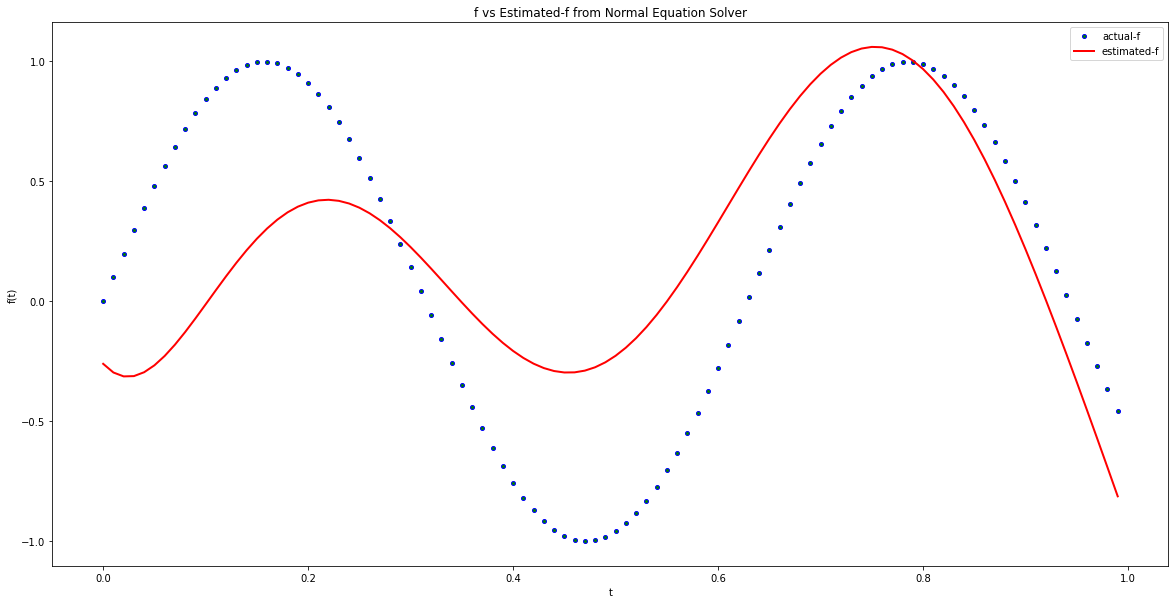

Modified Gram-Schmidt is performed well only.  
Error using frobenious norm is: 0.06750554663166686


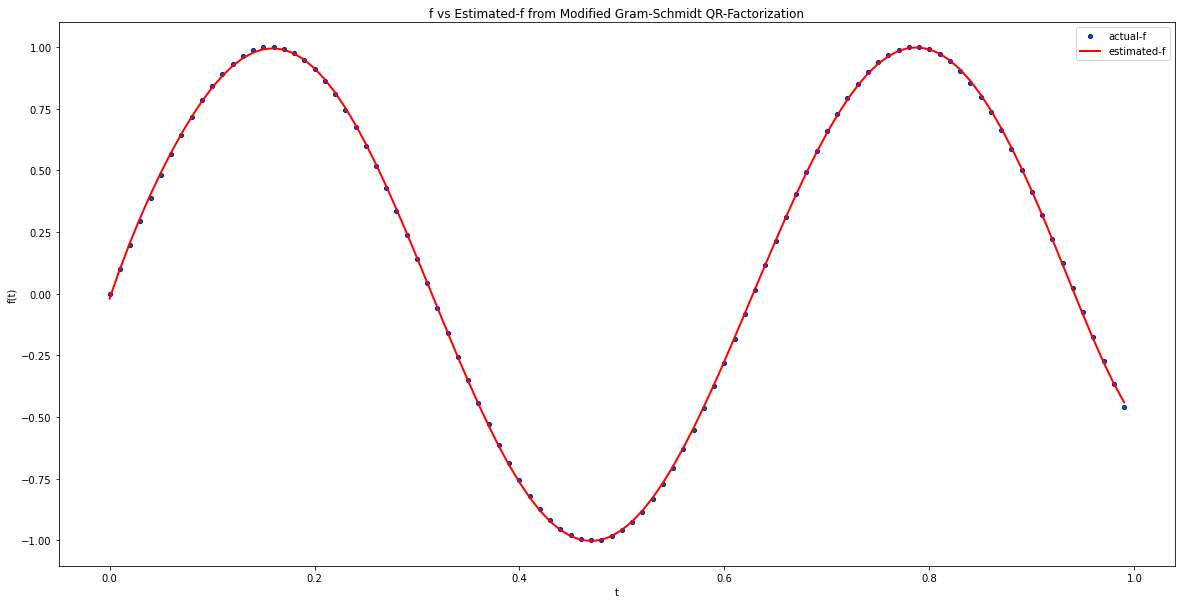

----------------------------

The performance of the SVD is very good.
But, It needs the more compuational operations compared with others.

Since m=100 and n=15, SVD is preferable only. 

Error using frobenious norm is: 1.6052212969326418e-06


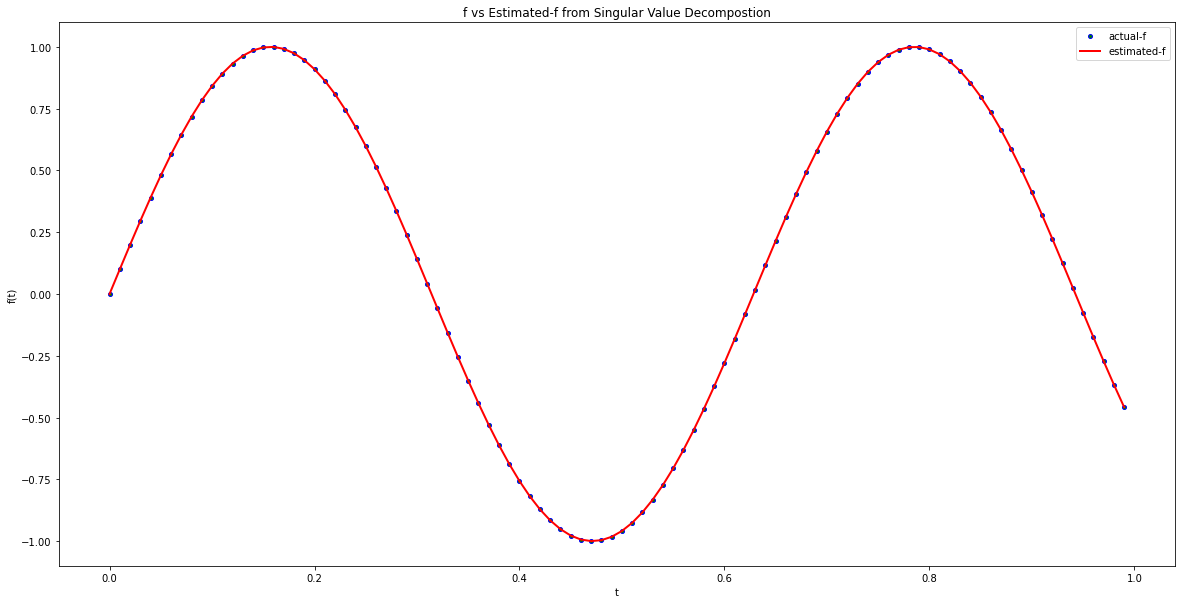

House-Holder also performed very well in solving this least-squares problem.
Since, House-Holder computational complexity is less compared with SVD House-Holder given best performance in this.

 Error using frobenious norm for built in QR is: 1.5994482944987431e-06



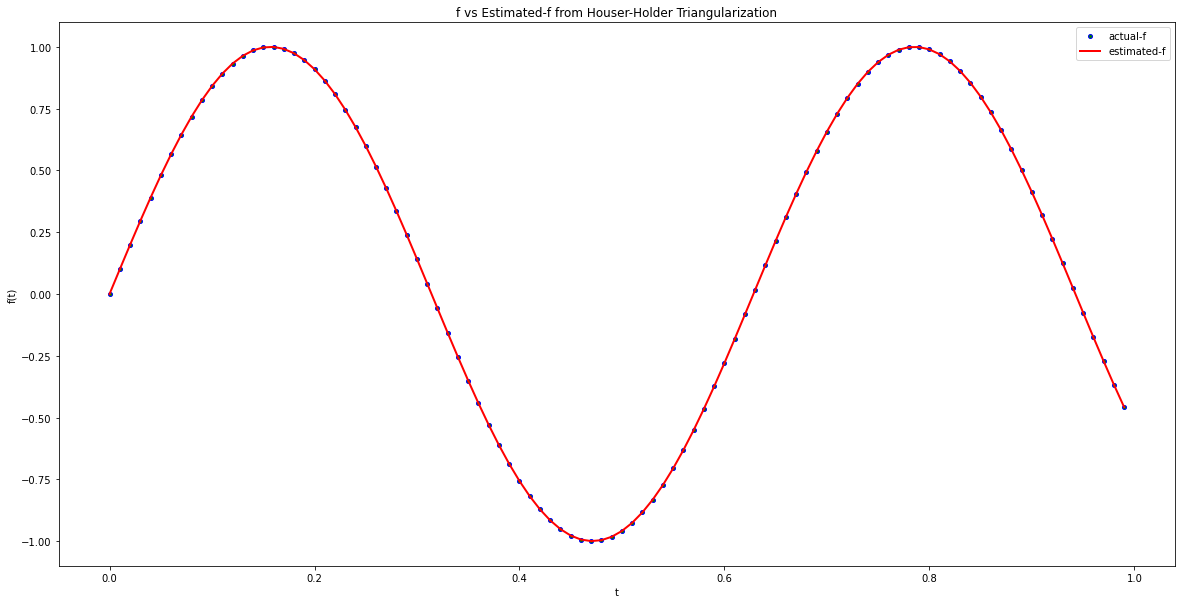